Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [94]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [95]:
library(tidyverse)

df_airbnb<-airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [96]:
df_airbnb$Square.Meters<-df_airbnb$Square.Feet*0.092903

In [97]:
library(tidyverse)
df_madrid<-df_airbnb %>% 
    filter(Room.Type=="Entire home/apt" & City=='Madrid' & Neighbourhood!='') %>% 
    select(-c("Room.Type",'City')) %>%
    droplevels()

set.seed(123)

In [98]:
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [99]:
 print(paste("El porcentaje los apartamentos que tienen NA en Square.Meters es: ",sum(is.na(df_madrid$Square.Meters)/nrow(df_madrid))*100,"%"))

[1] "El porcentaje los apartamentos que tienen NA en Square.Meters es:  93.8046777361185 %"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [100]:
print(paste("El porcentaje de apartamentos que tienen 0 metros cuadrados es: ",sum(df_madrid$Square.Meters==0,na.rm=T)/sum(!is.na(df_madrid$Square.Meters))*100,"%"))

[1] "El porcentaje de apartamentos que tienen 0 metros cuadrados es:  36.8876080691643 %"


Reemplazar todos los 0m^2 por NA 

In [101]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))

summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


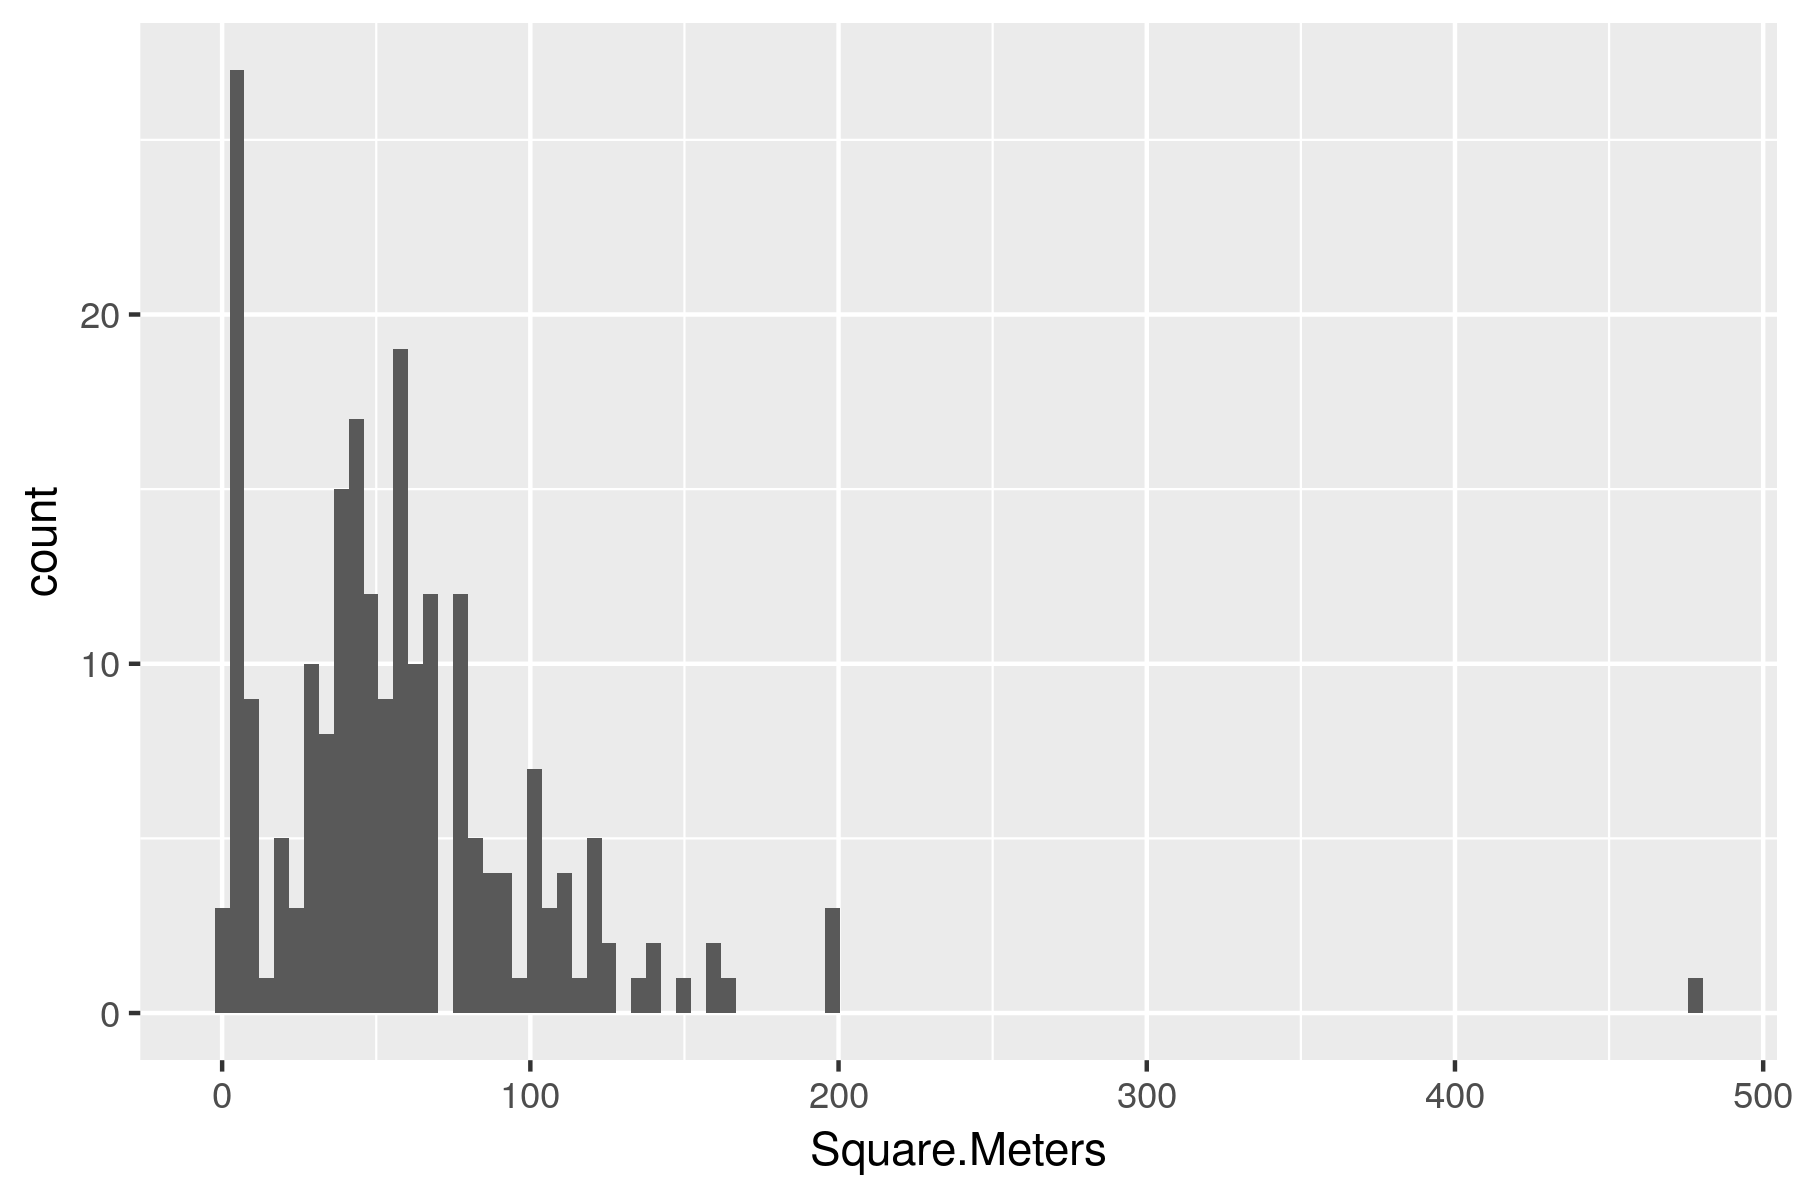

In [102]:
df_madrid %>% ggplot(aes(x=Square.Meters))+geom_histogram(bins=100)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [103]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters<20, NA, Square.Meters))

In [104]:
df_madrid %>% filter(Square.Meters<20)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


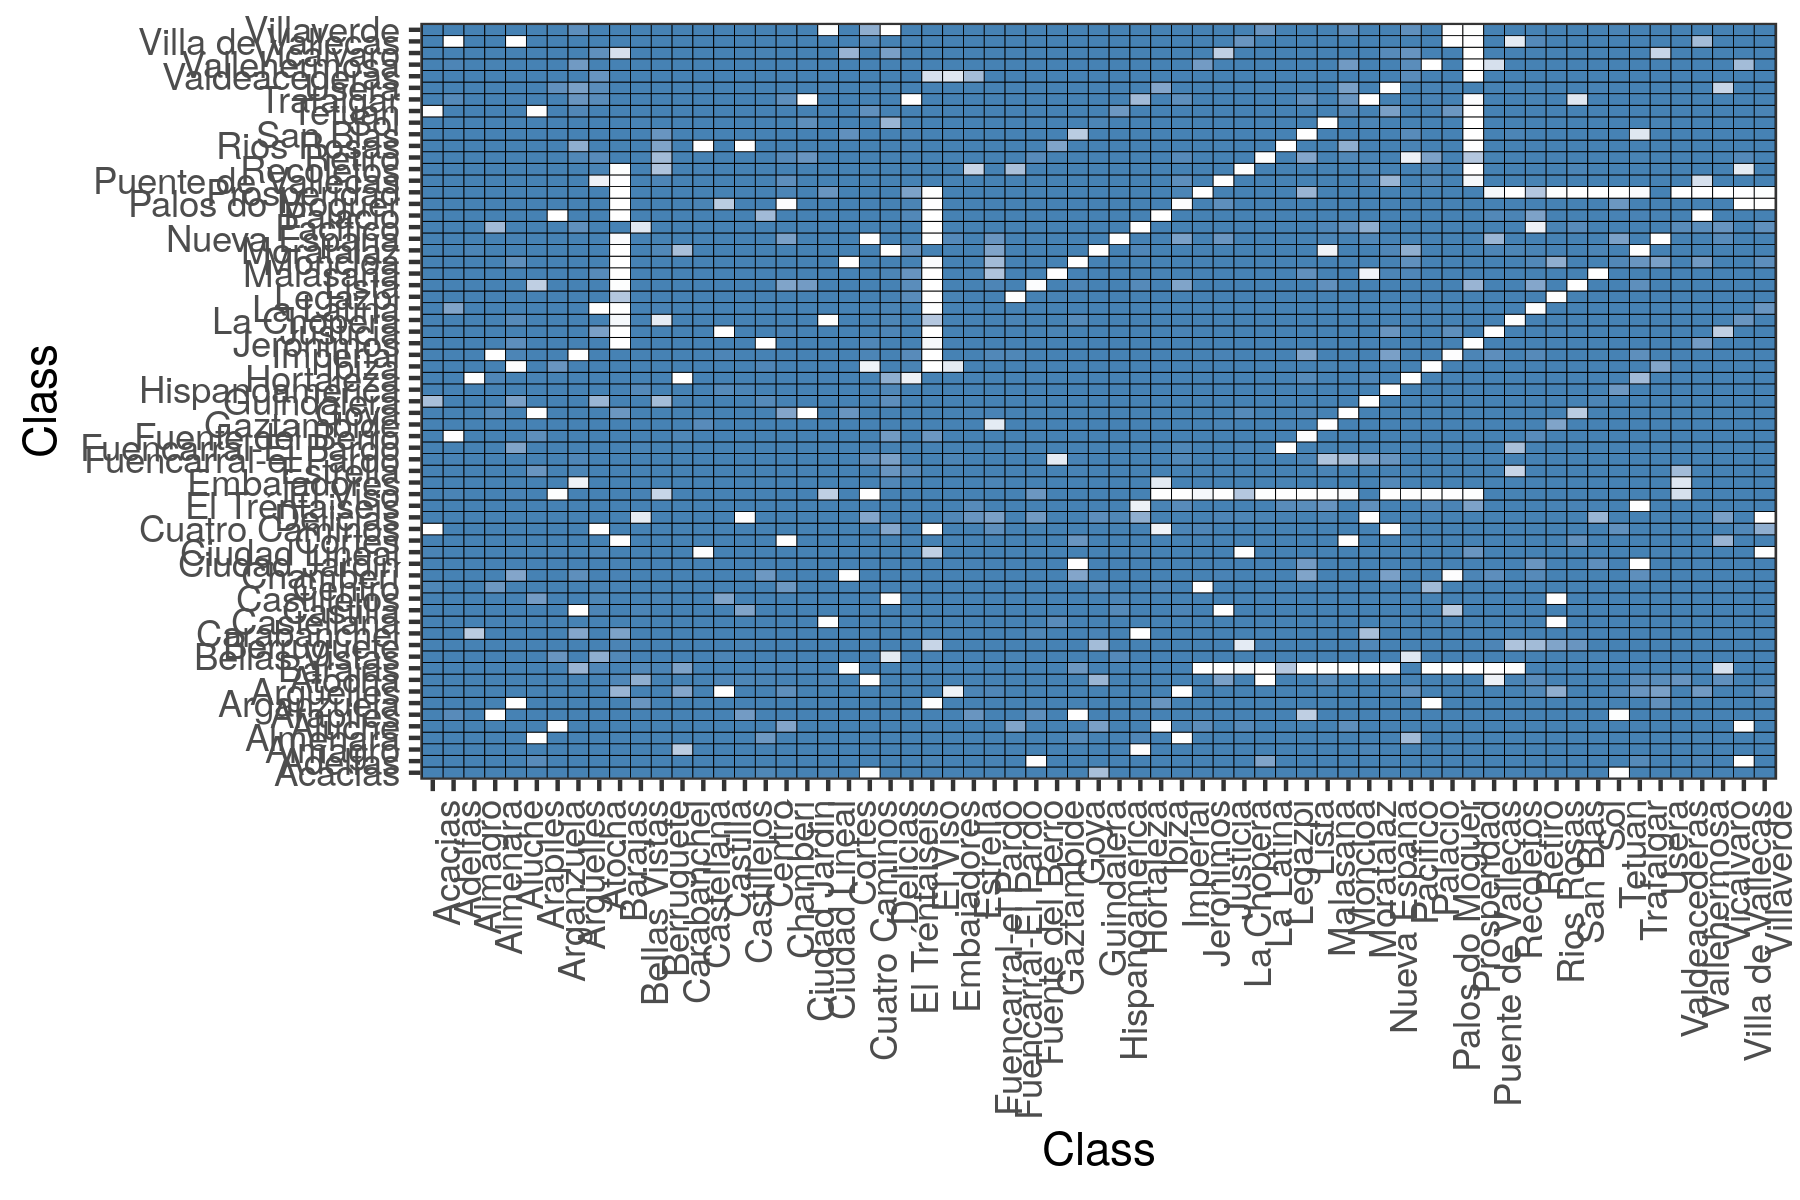

In [105]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [106]:
f_dist<-as.dist(1-resm)
hc <- hclust(f_dist,method="complete")
hcd <- as.dendrogram(hc)

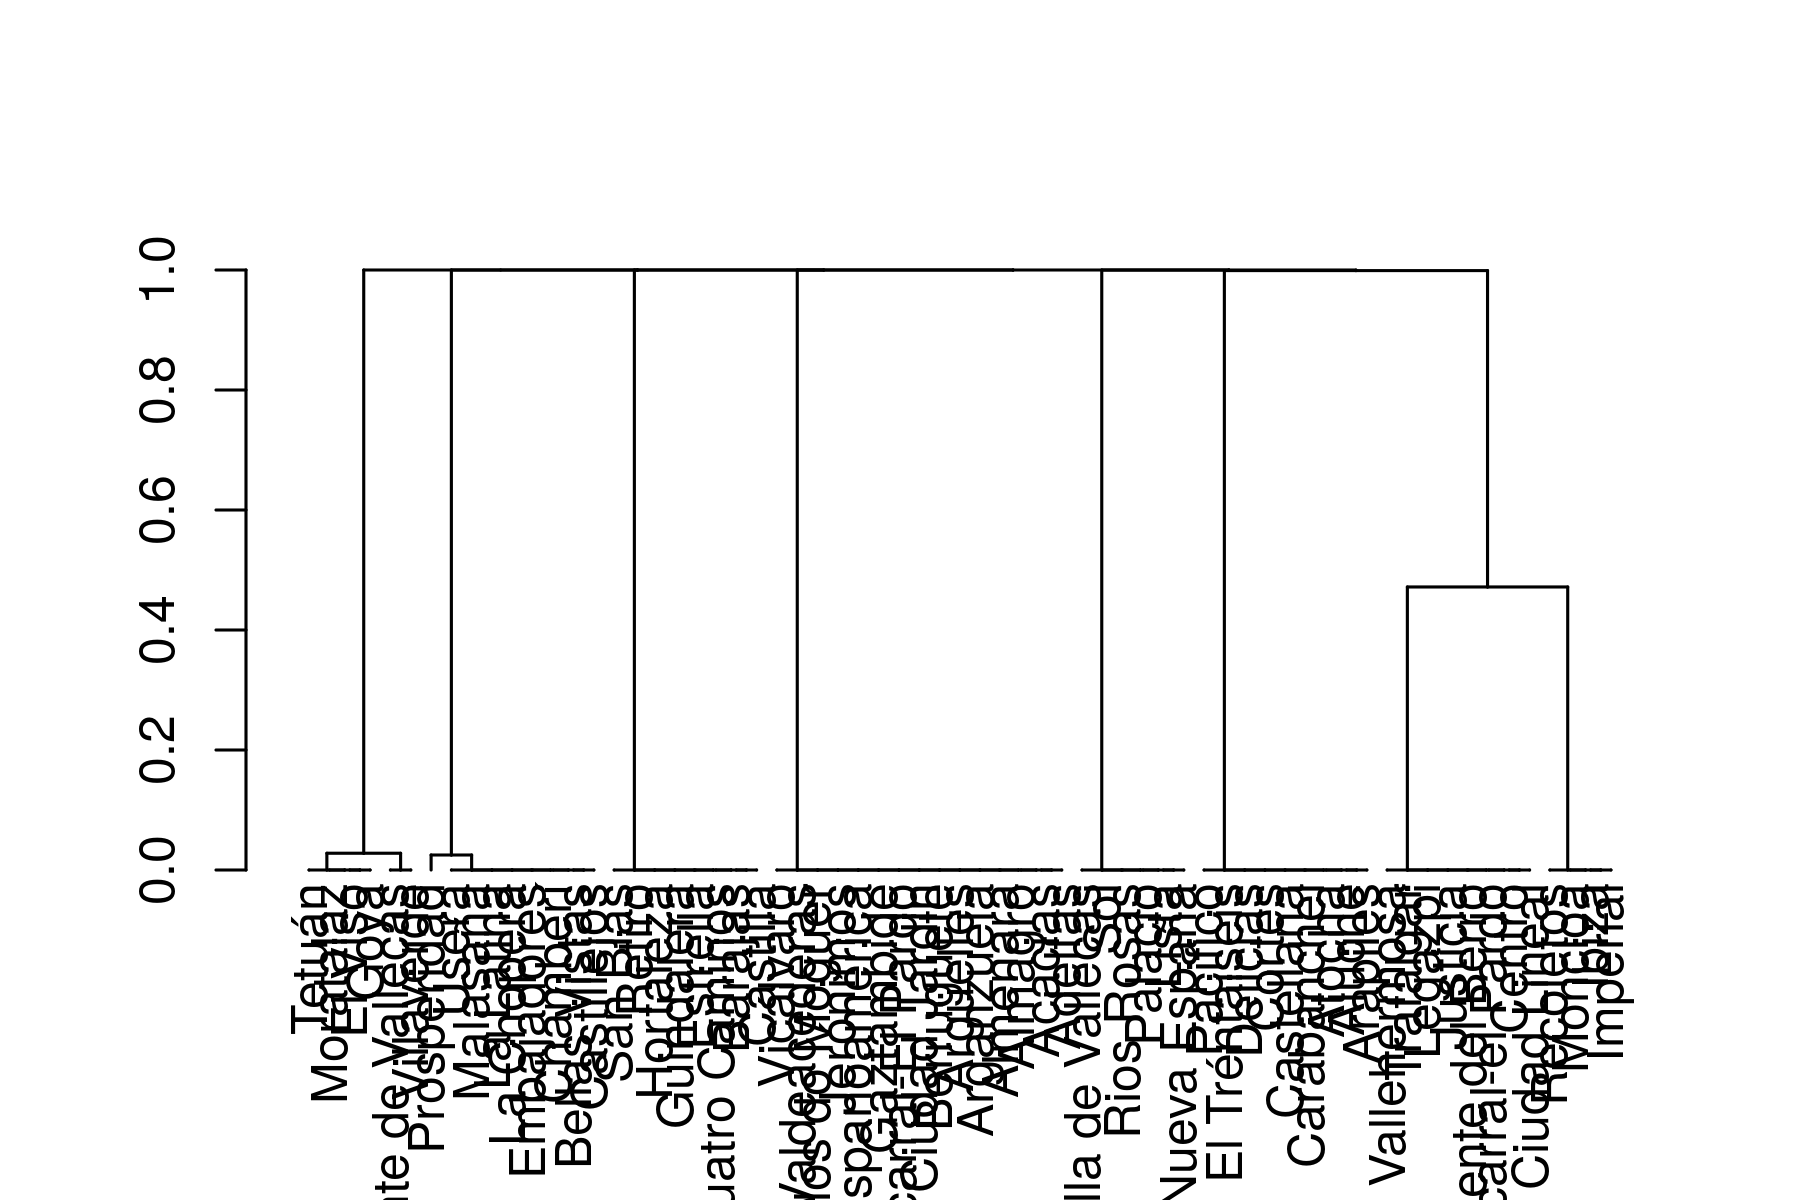

In [107]:
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

In [108]:
ct<-cutree(hc,h=0.9)

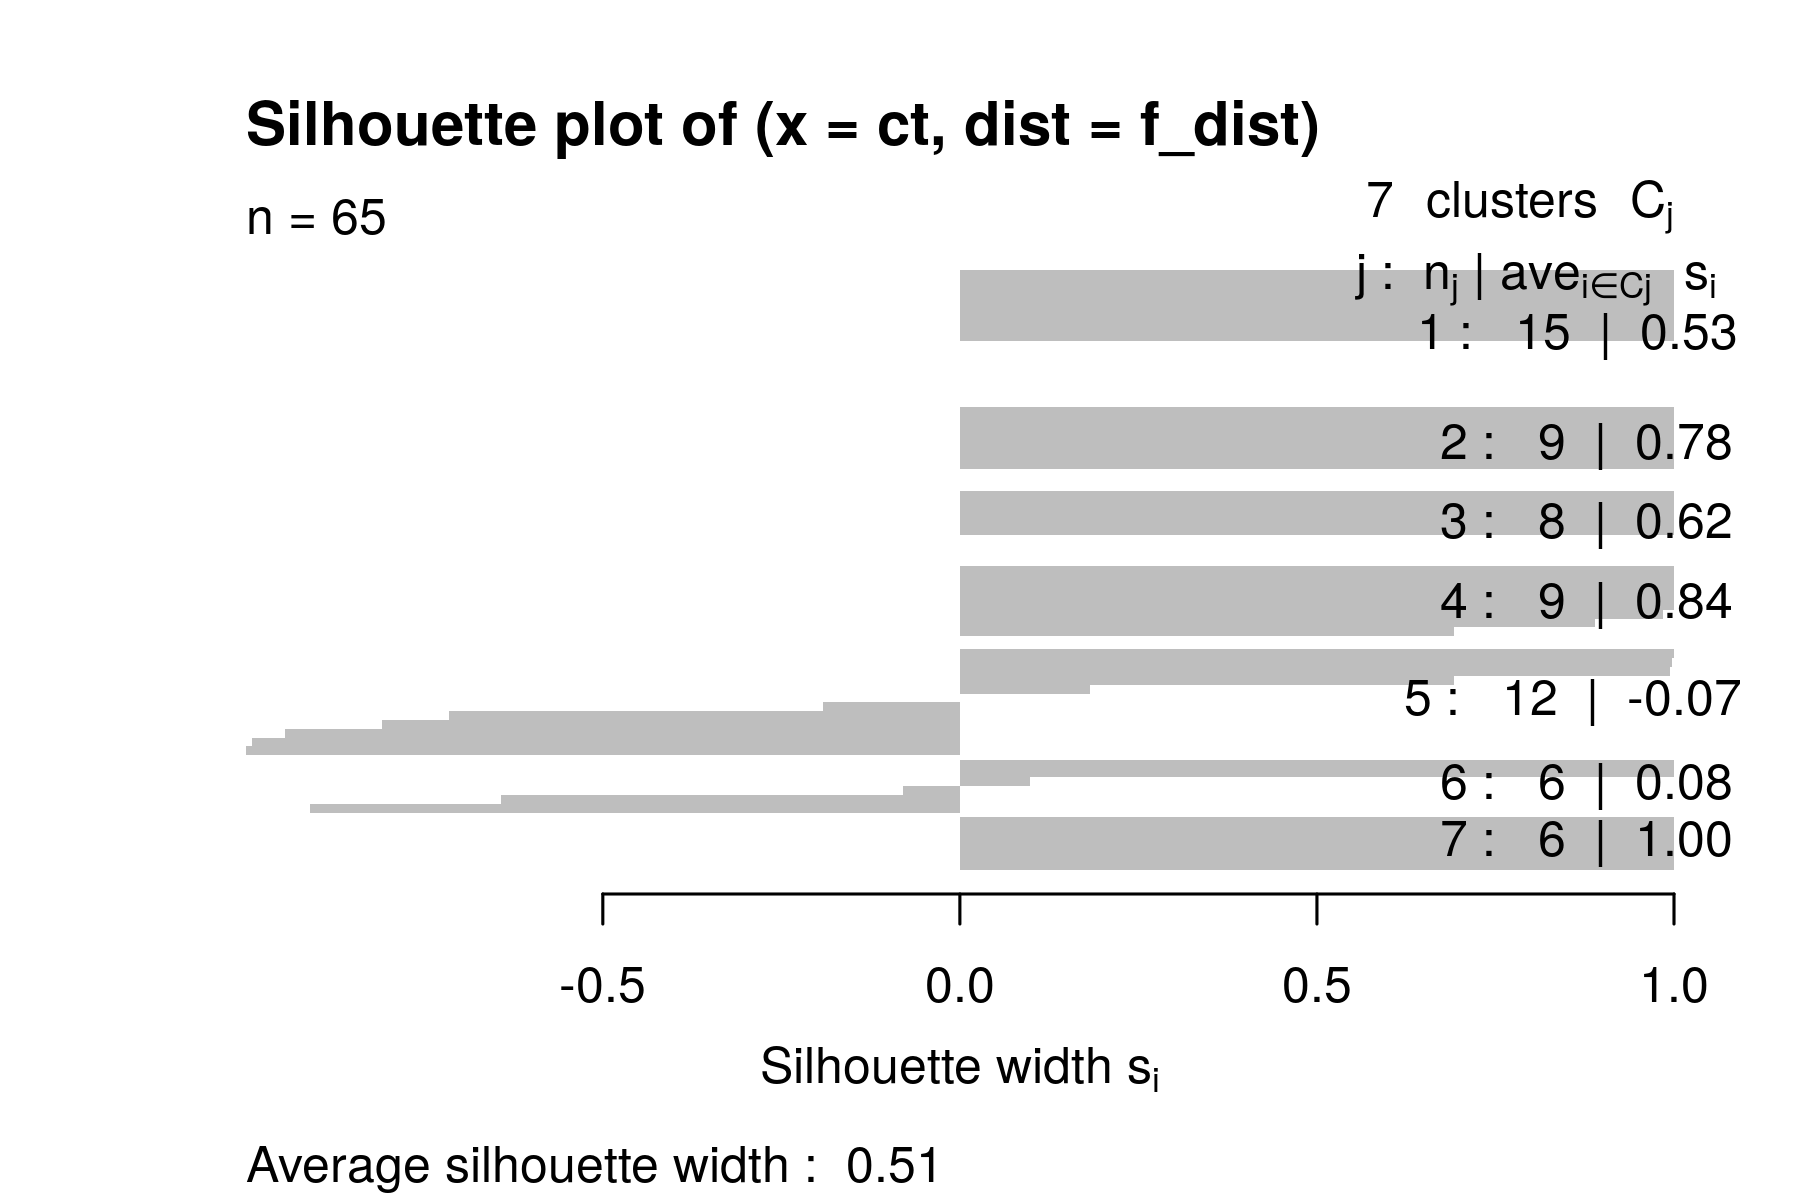

In [109]:
library(cluster)
sil<-silhouette(ct,f_dist)
plot(sil,border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [110]:
df_barrios<-data.frame(names=names(ct),neighb_id=paste0("Neighb_id_",ct))
head(df_barrios)

,names,neighb_id
,<fct>,<fct>
1,Acacias,Neighb_id_1
2,Adelfas,Neighb_id_1
3,Almagro,Neighb_id_1
4,Almenara,Neighb_id_1
5,Aluche,Neighb_id_2
6,Arapiles,Neighb_id_2


In [111]:
df_madrid_id <- df_madrid %>% 
    inner_join(df_barrios,by=c("Neighbourhood"='names')) %>%
    filter(!is.na(Square.Meters))
# El inner join es equivalente a:
#df_madrid<-merge(df_madrid,df_barrios,by.x = "Neighbourhood",by.y='names')

dim(df_madrid_id) 
head(df_madrid_id)

[1] 174  14

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Justicia,3,1.0,0,1,53,484,1,10,90,40.42173,-3.700142,44.96505,Neighb_id_5
2,Malasaña,5,2.5,3,3,73,1076,2,10,96,40.42308,-3.705691,99.96363,Neighb_id_4
3,Castellana,7,2.0,3,6,450,1292,1,0,NA,40.43186,-3.685074,120.03068,Neighb_id_2
4,Castilla,6,2.0,2,4,85,1130,4,10,100,40.47267,-3.675531,104.98039,Neighb_id_3
5,Malasaña,2,1.0,0,1,75,377,1,0,67,40.42902,-3.703978,35.02443,Neighb_id_4
6,Embajadores,3,1.0,1,2,85,700,2,8,93,40.40831,-3.703663,65.03210,Neighb_id_4


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [112]:
set.seed(12)
idx<-sample(1:nrow(df_madrid_id),nrow(df_madrid_id)*0.8)
df_madrid_id_train<-df_madrid_id[idx,]
df_madrid_id_test<-df_madrid_id[-idx,]

In [113]:
model<-lm(formula=Square.Meters~neighb_id+neighb_id+Price+Bedrooms, df_madrid_id_train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + neighb_id + Price + 
    Bedrooms, data = df_madrid_id_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.963 -13.726  -1.447  10.668 241.930 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           37.14260    8.52075   4.359 2.64e-05 ***
neighb_idNeighb_id_2 -33.70286   11.23635  -2.999  0.00325 ** 
neighb_idNeighb_id_3 -27.48185   12.99673  -2.115  0.03639 *  
neighb_idNeighb_id_4 -35.54214    8.70534  -4.083 7.76e-05 ***
neighb_idNeighb_id_5 -18.23959   12.42996  -1.467  0.14470    
neighb_idNeighb_id_6 -34.72402   17.48390  -1.986  0.04915 *  
neighb_idNeighb_id_7 -22.35543    9.49722  -2.354  0.02009 *  
Price                  0.17829    0.04368   4.082 7.79e-05 ***
Bedrooms              27.17653    3.17669   8.555 2.97e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.12 on 129 degrees of freedom
  (1 observation deleted d

In [114]:
caret::postResample(predict(model,df_madrid_id_train),obs = df_madrid_id_train$Square.Meters)
caret::postResample(predict(model,df_madrid_id_test),obs = df_madrid_id_test$Square.Meters)

RMSE   Rsquared        MAE 
30.0850667  0.6194171 17.7850559

RMSE  Rsquared       MAE 
25.809646  0.547652 18.047514

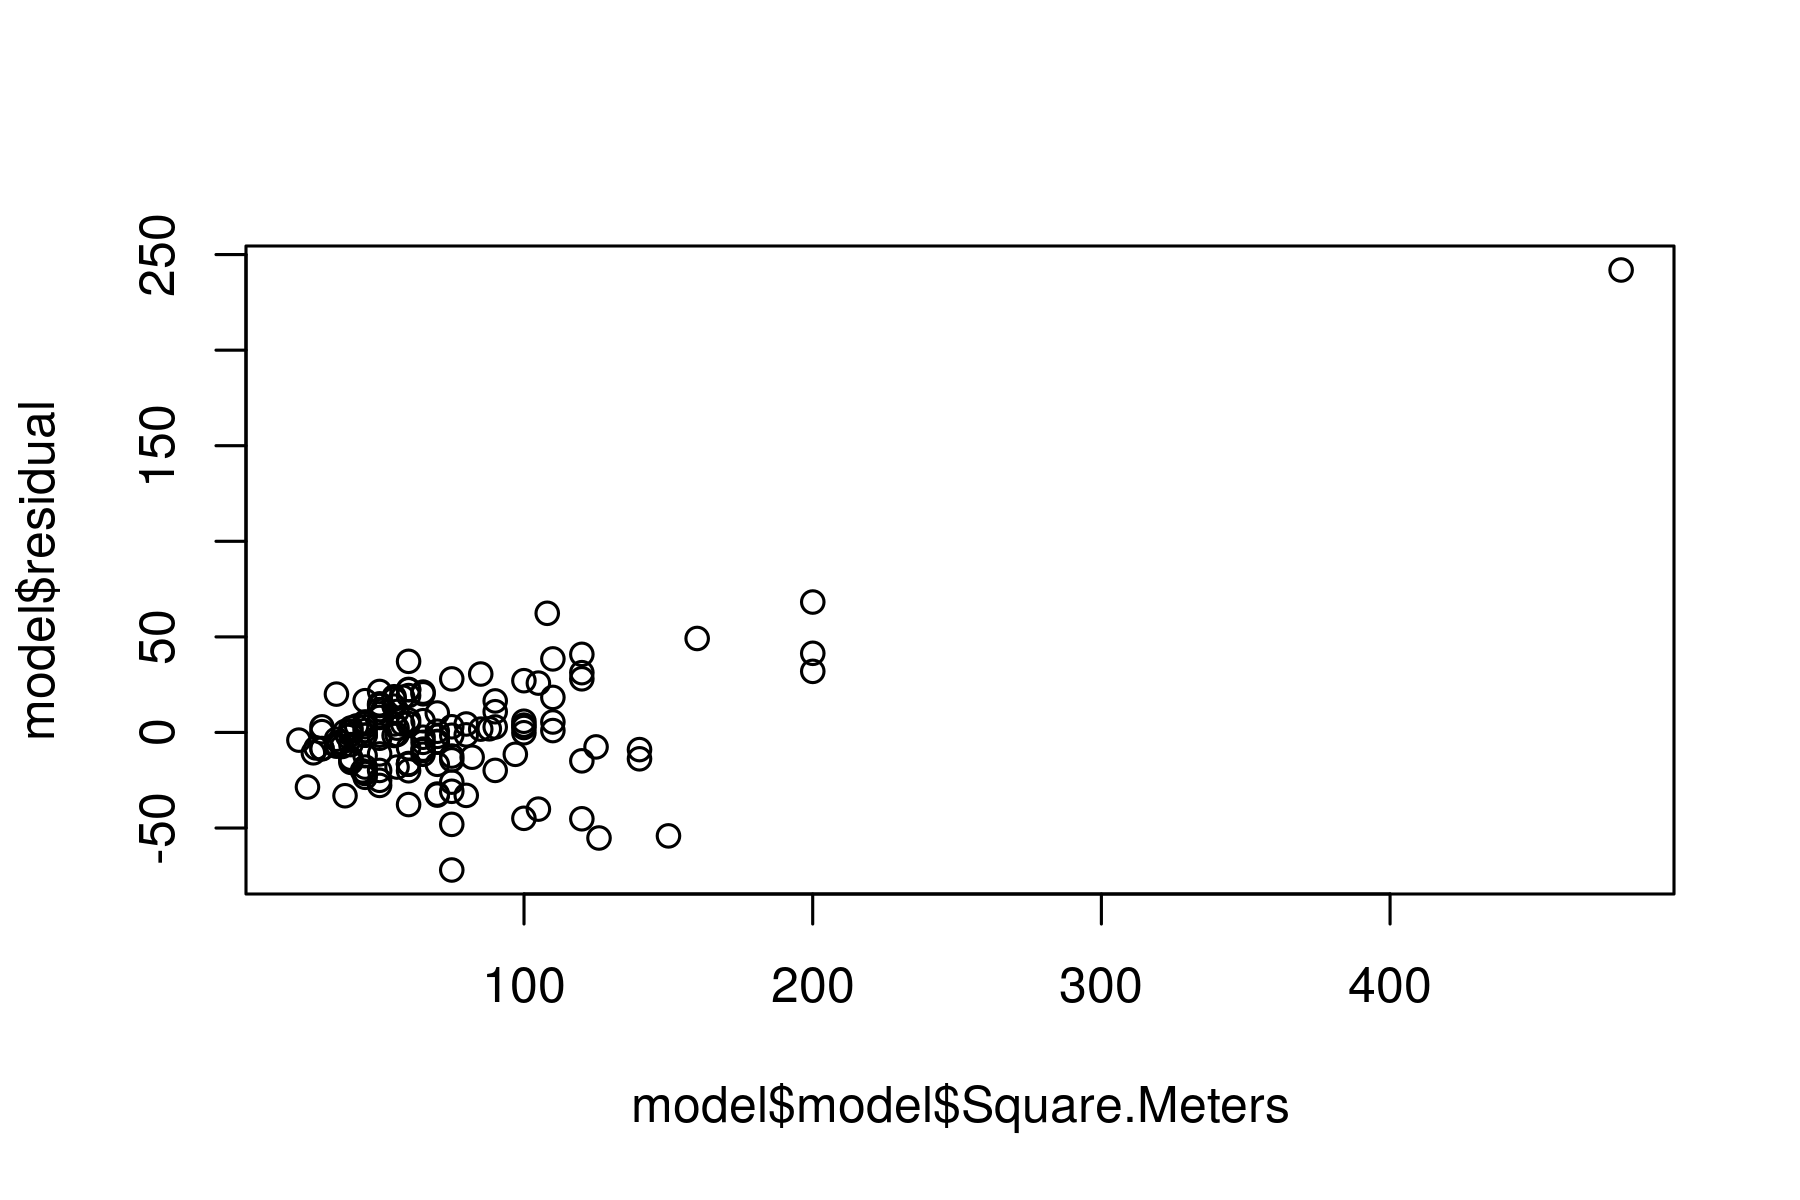

In [115]:
plot(model$model$Square.Meters,model$residual)

In [116]:
#Hay un poco de heterocedasticidad y tambien un outlier

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

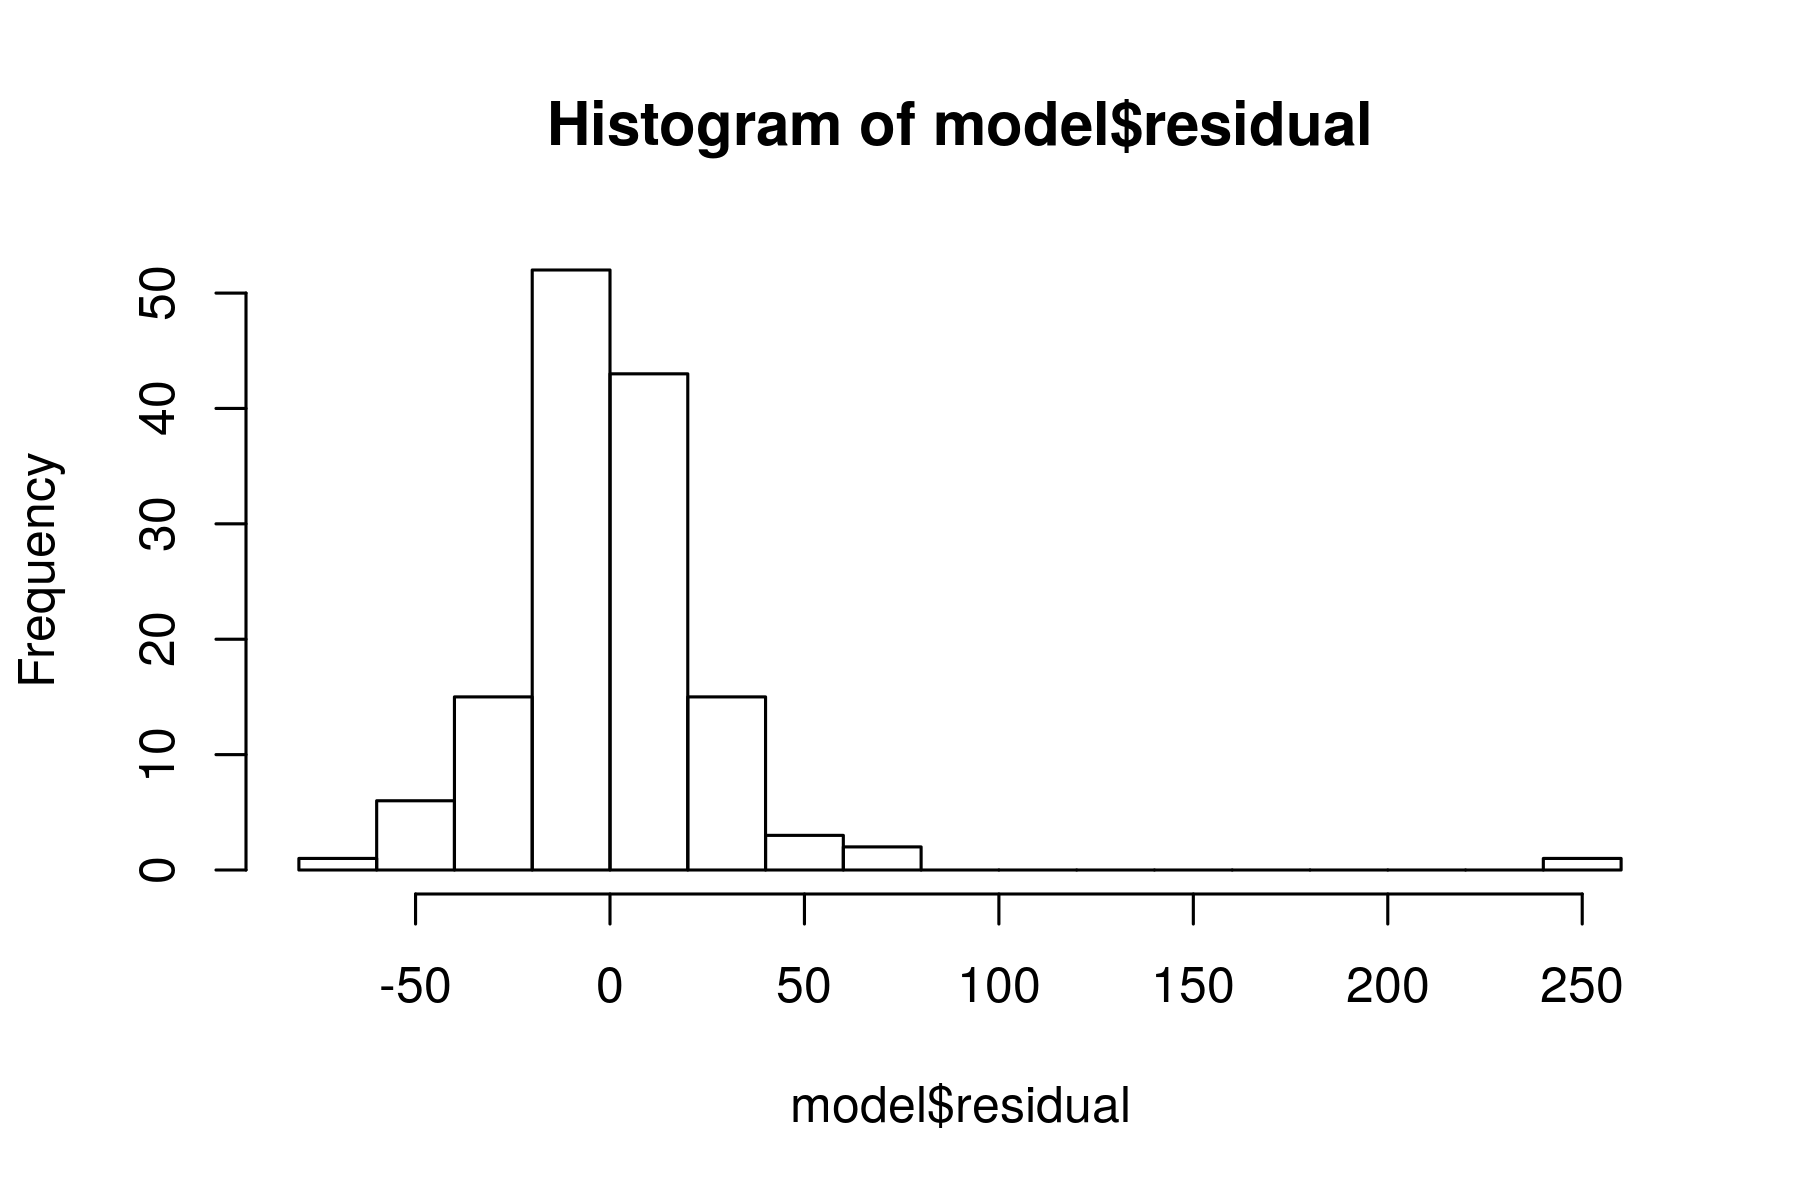

In [117]:
hist(model$residual,breaks=20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [118]:
neighb_id_sol<-df_barrios %>% filter(names=="Sol") %>% select(neighb_id)
paste0("El id del barrio del Sol es: ",neighb_id_sol)
df_appartment<-data.frame(neighb_id=neighb_id_sol,Bedrooms=3,Price=80,Accommodates=6)
pred_m2<-predict(model,df_appartment)
paste("Sus metros cuadrados son:",round(pred_m2))

[1] "El id del barrio del Sol es: 7"

[1] "Sus metros cuadrados son: 111"

In [119]:
 cf<-coefficients(model)
cf_bedroom_sol<-cf['Bedrooms']

paste("En media cada habitación aumenta el tamaño del apartemos en:",round(cf_bedroom_sol,2),"m^2")

[1] "En media cada habitación aumenta el tamaño del apartemos en: 27.18 m^2"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [120]:
df_madrid_id_all <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid_id_all$Square.Meters[is.na(df_madrid_id_all$Square.Meters)]<-
 round(predict(model,df_madrid_id_all[is.na(df_madrid_id_all$Square.Meters),]))

head(df_madrid_id_all)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Arapiles,2,1.0,1,2,40,NA,1,0,100,40.43281,-3.706681,38,Neighb_id_2
2,Trafalgar,6,2.5,3,5,220,NA,1,0,96,40.42931,-3.700321,140,Neighb_id_5
3,Trafalgar,3,1.5,1,1,103,NA,1,0,91,40.43018,-3.701314,64,Neighb_id_5
4,Trafalgar,8,2.0,3,5,190,NA,4,20,97,40.42883,-3.696778,134,Neighb_id_5
5,Trafalgar,4,1.0,1,2,75,NA,2,10,98,40.43165,-3.703527,59,Neighb_id_5
6,Trafalgar,3,1.0,1,2,50,NA,2,0,93,40.43068,-3.704753,55,Neighb_id_5


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [121]:
df_madrid_pca<-na.omit(df_madrid_id_all[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude",
                                           "Beds","Price","Review.Scores.Rating","Square.Meters",'neighb_id')])

# Aunque podríamos dividir los datos entre test y training, aquí realmente no estamos tratando de hacer una 
# predicción, sino tratando de encontrar en el mismo dataset los elementos más similares.
pca_df<-prcomp(df_madrid_pca %>% select(-neighb_id),center = TRUE, scale. = TRUE)

In [122]:
summary(df_madrid_pca)

  Accommodates      Bathrooms        Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.000   Min.   :0.000   Min.   :40.33  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.000   Median :1.000   Median :40.42  
 Mean   : 4.141   Mean   :1.244   Mean   :1.446   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.:40.43  
 Max.   :16.000   Max.   :6.000   Max.   :8.000   Max.   :40.51  
                                                                 
   Longitude           Beds           Price        Review.Scores.Rating
 Min.   :-3.835   Min.   : 1.00   Min.   : 10.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.00   1st Qu.: 55.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.00   Median : 70.00   Median : 93.00      
 Mean   :-3.699   Mean   : 2.41   Mean   : 85.61   Mean   : 91.31      
 3rd Qu.:-3.696   3rd Qu.: 3.00   3rd Qu.: 98.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.00   Max.  

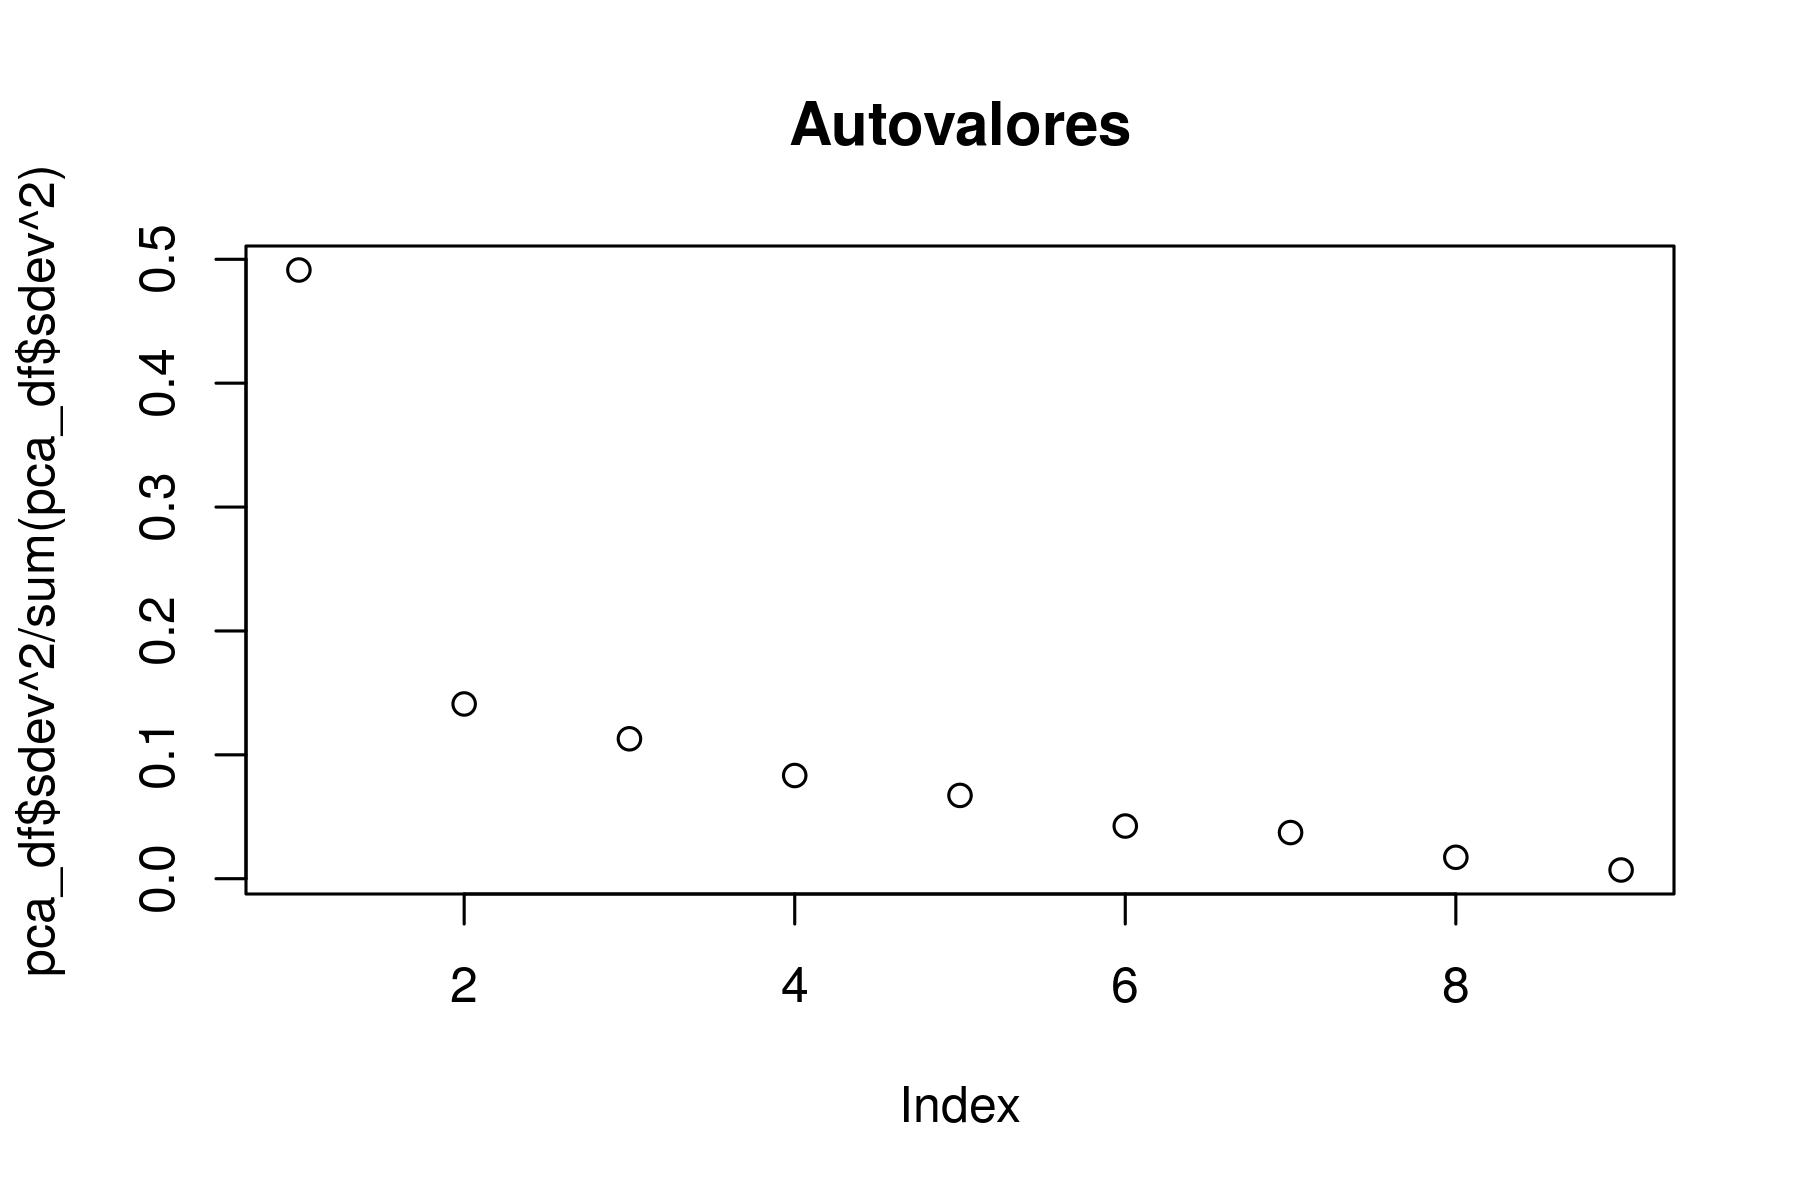

In [123]:
plot(pca_df$sdev^2/sum(pca_df$sdev^2),main="Autovalores")

In [124]:
str(pca_df)

List of 5
 $ sdev    : num [1:9] 2.103 1.127 1.008 0.866 0.778 ...
 $ rotation: num [1:9, 1:9] 0.4157 0.3765 0.4292 0.036 0.0358 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 4.14 1.24 1.45 40.42 -3.7 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ scale   : Named num [1:9] 1.9106 0.516 0.9611 0.016 0.0175 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ x       : num [1:4746, 1:9] -1.563 4.61 -0.505 4.405 -0.624 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4746] "1" "2" "3" "4" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [125]:
get_closest_element<-function(pca_df, new_flat,num_flats){
    pca_new<-predict(pca_df,newdata = new_vector)
    pca_orig<-pca_df$x[,1:2]
    pca_new <-pca_new[,1:2]

    idx<-order(rowSums((pca_new-pca_orig)^2))
    df_madrid_pca[idx %in% 1:num_flats,]
}

In [126]:
new_vector<-(df_madrid_pca %>% select(-neighb_id))[10,]
new_vector
get_closest_element(pca_df,new_vector,5)

,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
10,2,1,1,40.38709,-3.70131,1,49,94,38


,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters,neighb_id
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>
2654,6,2,2,40.41473,-3.701511,3,125,95,80,Neighb_id_2
3109,8,2,3,40.42397,-3.694630,3,120,72,122,Neighb_id_5
3451,3,1,1,40.40756,-3.692152,3,49,91,39,Neighb_id_2
5297,4,1,2,40.40508,-3.677945,2,80,90,72,Neighb_id_2
5335,3,1,0,40.41288,-3.697148,2,72,95,16,Neighb_id_2


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [127]:
pca_x_neighb<-cbind(data.frame(pca_df$x),neighb_id=df_madrid_pca$neighb_id)
pca_cols<-colnames(pca_x_neighb)[1:ncol(pca_x_neighb)-1]
df_F_val<-data.frame(pca=pca_cols,F=NA)
for (idx in (1:nrow(df_F_val))){
    formula<-paste(pca_cols[idx],"~ neighb_id")
    df_F_val$F[idx]<-oneway.test(pca_x_neighb,formula = as.formula(formula))$statistic
}
df_F_val

pca,F
<fct>,<dbl>
PC1,26.198845
PC2,241.445943
PC3,6.789502
PC4,56.683961
PC5,13.730085
PC6,41.041034
PC7,16.744170
PC8,1.704787
PC9,1086.211831


In [128]:
#PC2 y PC9 son las que mas varian

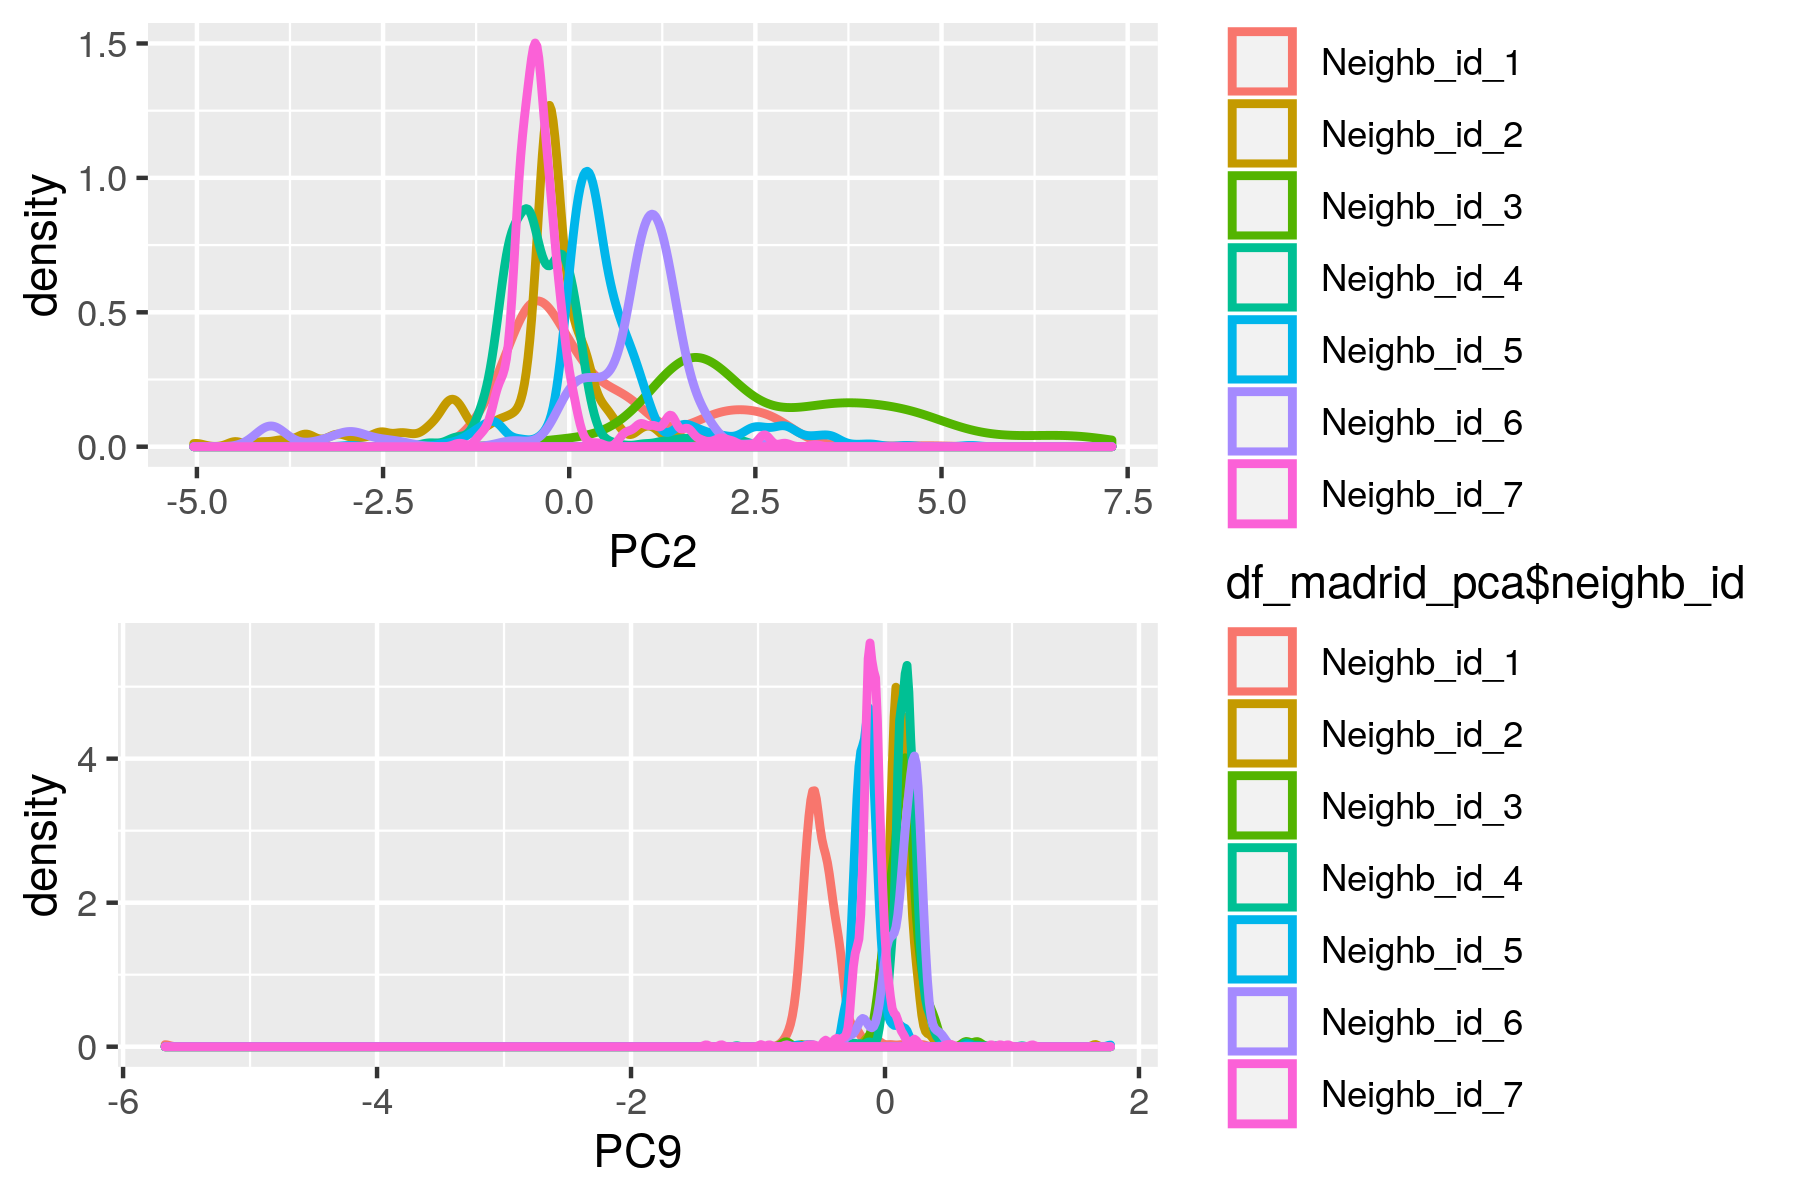

In [129]:
library(ggpubr)
g1<-ggplot(data.frame(pca_df$x),aes(x=PC2,color=df_madrid_pca$neighb_id))+geom_density(size=1)
g2<-ggplot(data.frame(pca_df$x),aes(x=PC9,color=df_madrid_pca$neighb_id))+geom_density(size=1)

ggarrange(g1,g2,ncol=1)

In [130]:
pca_df$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Accommodates,0.41569457,-0.09492859,0.122135114,-0.12314753,0.3165976163,-0.321820452,0.196306159,-0.73685347,-5.303477e-02
Bathrooms,0.37650846,0.02583175,-0.088281427,0.11033096,-0.4849481236,-0.479990446,-0.609772250,0.01482775,9.450096e-06
Bedrooms,0.42917385,-0.01917166,0.046721334,-0.07201299,0.2058541851,0.496289715,-0.309812557,0.00669125,6.506654e-01
Latitude,0.03603063,0.70836252,0.019353854,0.64431634,0.2651117859,-0.083338121,0.020216412,-0.02378649,5.658812e-02
Longitude,0.03580513,0.68352571,-0.167707957,-0.69212649,-0.1420359911,0.005778782,0.057839720,-0.02814981,3.223047e-04
Beds,0.40745843,-0.05768312,0.092638854,-0.15281519,0.3963691519,-0.379976305,0.208311847,0.67263520,-3.732845e-02
Price,0.37104493,-0.01267788,-0.113096321,0.20508210,-0.5673544211,0.096434274,0.658149562,0.03265515,2.046892e-01
Review.Scores.Rating,0.03218374,-0.12403162,-0.961867955,0.06595515,0.2296890361,-0.019843225,-0.001947194,-0.02900235,-6.677154e-03
Square.Meters,0.44038222,0.04579264,0.006579608,0.05943099,-0.0004923457,0.508609216,-0.115521747,0.03284068,-7.261431e-01


In [131]:
#PC2 contribuye principalmente a la Latitude y Longitude
#PC9 contribuye al Square Meters y Bedrooms

In [132]:
#Las coordenadas PC2 y PC9 son las que mejor permite clasificar por id de barrio